In [20]:
##
using Plots, LinearAlgebra, Random, StatsBase, SparseArrays



In [3]:
## Least-squares fitting with Convex.jl
# Convex.jl is a convex programming language that allows you
# to specify an objective function easily and solve the
# resulting optimization problem with a variety of different solvers.

# To install Convex.jl, use these lines
# using Pkg
# Pkg.add("Convex")
# Pkg.add("SCS") # one of the solvers that works with Convex.jl



In [21]:
##
using Convex, SCS



In [22]:
## Step 1: Create a set of data with a linear model
m=40
n=2
A = randn(m,n)
xex = [5;1]      # "b" = 5 in ax+b and a=1
pts = -10.0 .+ 20*rand(m,1)
A = [ones(m,1) pts]
b = A*xex + .5*randn(m,1)



40×1 Matrix{Float64}:
 -2.9885903727059366
  4.255282107137367
 -1.0745251584299176
 11.553210308659262
 -2.1073929022036806
  9.338197280919426
  0.7657630299273236
 -0.40647509215544436
 -0.7812185267291656
  3.1992946445464003
  6.630244389441987
 -3.5905638217404157
  5.857905218560363
  ⋮
  4.211401772126315
 13.751954104274251
 10.009066673725556
  7.2743939050128255
  8.434444686482264
  0.07151662681515308
 13.61385047920837
 14.450885573298878
 10.702287482635775
  4.6633213146623
 10.454982845713031
 12.520233506943965

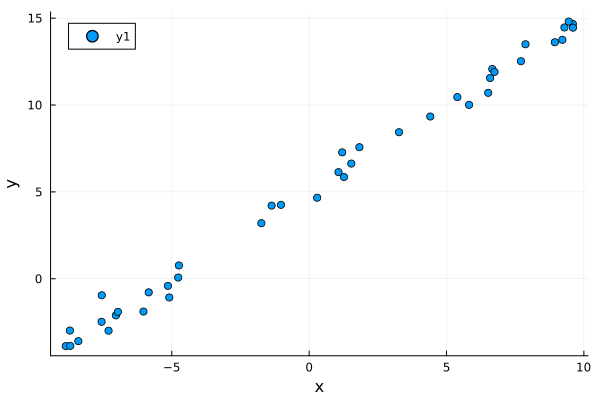

In [23]:
## Show the linear model
scatter(pts,b, dpi=300)
xlabel!("x")
ylabel!("y")



In [25]:
##
## The convex.jl problem
x = Variable(n)
problem = minimize(sumsquares(b - A*x))
solve!(problem, SCS.Optimizer)
xls = x.value
@show x



x = Variable
size: (2, 1)
sign: real
vexity: affine
id: 135…509
value: [5.014490417845416, 0.9964758969658832]
------------------------------------------------------------------
	       SCS v3.2.1 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 5, constraints m: 46
cones: 	  z: primal zero / dual free vars: 1
	  l: linear vars: 1
	  q: soc vars: 44, qsize: 2
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 100000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 86, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
------------------------------------------------------------------
     0| 1.71e+01  1.00e+00  1.62e+01

Variable
size: (2, 1)
sign: real
vexity: affine
id: 135…509
value: [5.014490417845416, 0.9964758969658832]

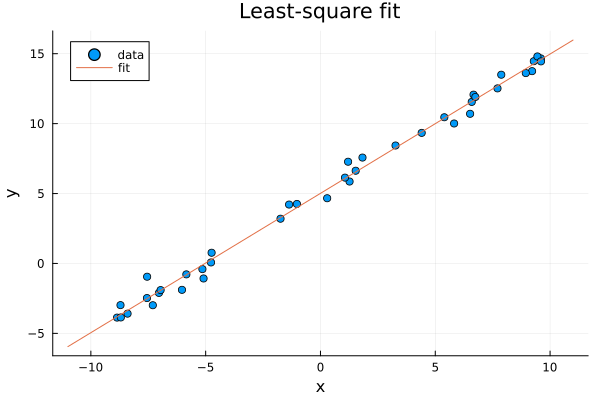

In [26]:
## Show the least squares fit
scatter(pts,b;label="data")
plot!([-11; 11], [1 -11; 1 11]*xls;label="fit")
#xaxis!([-11 11])
title!("Least-square fit")
xlabel!("x")
ylabel!("y")



In [27]:
## Now we add outliers
outliers = [-9.5; 9]
outvals = [20; -15]
A = [A; ones(length(outliers),1) outliers]
b = [b; outvals]
m = size(A,1)
pts = [pts;outliers]



42×1 Matrix{Float64}:
 -7.302184485897653
 -1.0256662649276684
 -5.0917924612814485
  6.587981992426606
 -7.034367680408082
  4.4084626219799645
 -4.741438290203068
 -5.141818200921817
 -5.840676857969704
 -1.7398043492919406
  1.534167883149502
 -8.401965535304988
  1.2668695524814382
  ⋮
  5.820413210203782
  1.202973386346315
  3.269683456482129
 -4.766755494443508
  8.943146372057765
  9.603020700140377
  6.5174737849834194
  0.292025858462603
  5.394626691576995
  7.7097515284128235
 -9.5
  9.0

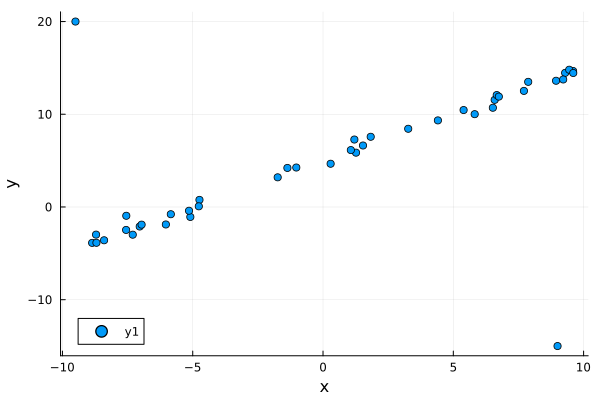

In [28]:
## Show the new data
scatter(pts,b)
xlabel!("x")
ylabel!("y")



------------------------------------------------------------------
	       SCS v3.2.1 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 5, constraints m: 48
cones: 	  z: primal zero / dual free vars: 1
	  l: linear vars: 1
	  q: soc vars: 46, qsize: 2
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 100000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 90, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
------------------------------------------------------------------
     0| 3.63e+01  1.00e+00  2.77e+01 -2.27e+00  1.00e-01  1.53e-04 
   250| 6.33e+00  1.14e-01  2.43e+00  1.39e+03  2.26e-02  1.67e-02 
   500| 1.2

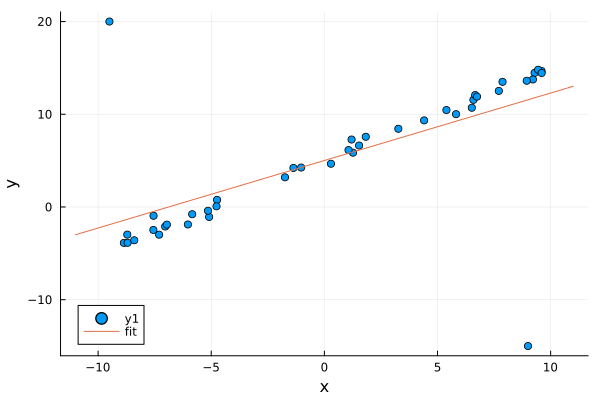

In [29]:
## Look at the LS fit
x = Variable(n)
problem = minimize(sumsquares(b - A*x))
solve!(problem, SCS.Optimizer)
xls = x.value
plot!([-11; 11], [1 -11; 1 11]*xls;label="fit")



------------------------------------------------------------------
	       SCS v3.2.1 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 171, constraints m: 295
cones: 	  z: primal zero / dual free vars: 43
	  l: linear vars: 126
	  q: soc vars: 126, qsize: 42
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 100000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 547, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
------------------------------------------------------------------
     0| 5.35e+01  1.55e+00  3.13e+03 -1.33e+03  1.00e-01  3.75e-04 
   100| 3.65e-03  1.75e-04  5.36e-03  1.15e+02  1.00e-01  1.19e-03 
--

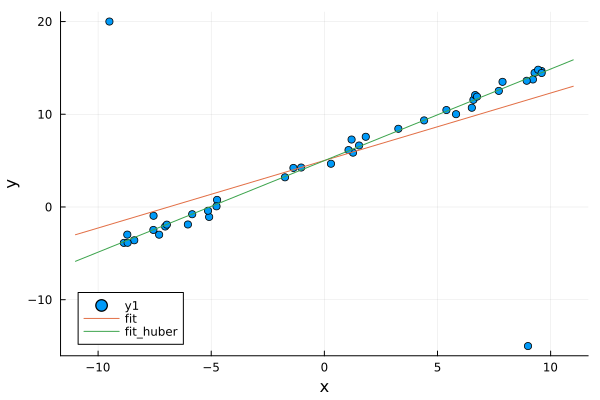

In [30]:
## Solve the Huber problem and look at the fit
x = Variable(n)
problem = minimize(sum(huber(b - A*x)))
solve!(problem, SCS.Optimizer)
xr = x.value
plot!([-11; 11], [1 -11; 1 11]*xr;label="fit_huber")


In [16]:
typeof(SCS.Optimizer)

DataType

In [18]:
typeof(SCS.Optimizer())

SCS.Optimizer

In [19]:
?SCS.Optimizer

```
Optimizer()
```

Create a new SCS optimizer.
